In [47]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import re as re
from bs4 import BeautifulSoup

In [48]:
req = requests.get("https://www.gumtree.sg/s-property-for-rent/v1c12p1")

In [49]:
contents = req.content
soup = BeautifulSoup(contents, "html.parser")
all_houses = soup.find_all("div", class_ = "tileV1")

In [50]:
l =[]
for house_price in all_houses:
    dataframe ={}
    a = house_price.find_all("div", class_ = "info")
    b = house_price.find_all("div", class_ = "category-location")
    locations = b[0].find_all("span")[0].text.split(",")[1][1:].replace(" ","")
    dataframe['Property Details'] = house_price.a.text
    dataframe['Price'] = a[0].find_all("span")[0].text.replace("\n", "")
    dataframe['Location'] = locations.split("/")
    l.append(dataframe)
print(l)

[{'Property Details': 'River valley home ready for rent ', 'Price': '                    $8,000                                    ', 'Location': ['Orchard', 'RiverValley']}, {'Property Details': 'Katong 2+1 Arthur condo 2.7k', 'Price': '                    $2,700                                    ', 'Location': ['Bedok', 'UpperEastCoast']}, {'Property Details': 'it’s See! spot on in a city Square Mall and Little India MRT. Must See! ', 'Price': '                    $1,800                                    ', 'Location': ['FarrerPark', 'SerangoonRd']}, {'Property Details': 'Sentosa Cove Lifestyle Living By E Sea @Private Pool n Berth @Dont Miss !!', 'Price': '                    $29,500                                    ', 'Location': ['Harbourfront', 'TelokBlangah']}, {'Property Details': 'TOP Floor. Nice View. Vacant Now.', 'Price': '                    $3,200                                    ', 'Location': ['FarrerPark', 'SerangoonRd']}, {'Property Details': 'Whole Unit (new) $

In [51]:
df = pd.DataFrame(l)
df

,Property Details,Price,Location
0,River valley home ready for rent,"$8,000 ...","[Orchard, RiverValley]"
1,Katong 2+1 Arthur condo 2.7k,"$2,700 ...","[Bedok, UpperEastCoast]"
2,it’s See! spot on in a city Square Mall and Li...,"$1,800 ...","[FarrerPark, SerangoonRd]"
3,Sentosa Cove Lifestyle Living By E Sea @Privat...,"$29,500 ...","[Harbourfront, TelokBlangah]"
4,TOP Floor. Nice View. Vacant Now.,"$3,200 ...","[FarrerPark, SerangoonRd]"
5,Whole Unit (new) $2900 @Coco Palms 5min walk P...,"$2,900 ...","[PasirRis, Tampines]"
6,Common Room for Rent In Yishun Ring Road,$700 ...,"[Sembawang, Yishun]"
7,Bedok / Marine Parade - Semi D Room for Rent -...,"$1,200 ...","[Bedok, UpperEastCoast]"
8,Bedok Nth St 3 502 for rent,"$2,300 ...","[Bedok, UpperEastCoast]"
9,Immediate Move-in,"$3,600 ...","[Hougang, Punggol, Sengkang]"


In [52]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return "".join(num)
df['Price'] = df['Price'].apply(lambda x: find_number(x))
df

,Property Details,Price,Location
0,River valley home ready for rent,8000,"[Orchard, RiverValley]"
1,Katong 2+1 Arthur condo 2.7k,2700,"[Bedok, UpperEastCoast]"
2,it’s See! spot on in a city Square Mall and Li...,1800,"[FarrerPark, SerangoonRd]"
3,Sentosa Cove Lifestyle Living By E Sea @Privat...,29500,"[Harbourfront, TelokBlangah]"
4,TOP Floor. Nice View. Vacant Now.,3200,"[FarrerPark, SerangoonRd]"
5,Whole Unit (new) $2900 @Coco Palms 5min walk P...,2900,"[PasirRis, Tampines]"
6,Common Room for Rent In Yishun Ring Road,700,"[Sembawang, Yishun]"
7,Bedok / Marine Parade - Semi D Room for Rent -...,1200,"[Bedok, UpperEastCoast]"
8,Bedok Nth St 3 502 for rent,2300,"[Bedok, UpperEastCoast]"
9,Immediate Move-in,3600,"[Hougang, Punggol, Sengkang]"


In [53]:
# converting the prices into int
df['Price'] = df['Price'].replace('', '0')
df['Price'] = df['Price'].astype(str).astype(int)


df.dtypes

Property Details    object
Price                int32
Location            object
dtype: object

In [54]:
# creating a new data column to categorise them into region

NorthEast = np.array(['Hougang', 'Punggol', 'Sengkang', 'AngMoKio', 'Bishan', 'BraddellRoad', 'Thomson, Seletar', 'YioChuKang'])
West = np.array(['BoonLay', 'Jurong', 'BukitBatok', 'ChoaChuKang', 'HillviewAvenue', 'UpperBukitTimah','Kranji', 'LimChuKang', 'SungeiGedong', 'Tengah'])
North = np.array(['Admiralty', 'Woodlands', 'Tagore', 'YioChuKang', 'Admiralty', 'Sembawang', 'Yishun'])
East = np.array(['Bedok','Changi','ChangiBay','PayaLebar','PasirRis', 'Tampines'])
Regions = []

for area in df['Location']:
        if area[0] in NorthEast:
            Regions.append('NorthEast')
        elif area[0] in West:
            Regions.append('West')
        elif area[0] in North:
            Regions.append('North')
        elif area[0] in East:
            Regions.append('East')
        else:
            Regions.append('Central')

df.insert(3, "Region", Regions, True)

df

,Property Details,Price,Location,Region
0,River valley home ready for rent,8000,"[Orchard, RiverValley]",Central
1,Katong 2+1 Arthur condo 2.7k,2700,"[Bedok, UpperEastCoast]",East
2,it’s See! spot on in a city Square Mall and Li...,1800,"[FarrerPark, SerangoonRd]",Central
3,Sentosa Cove Lifestyle Living By E Sea @Privat...,29500,"[Harbourfront, TelokBlangah]",Central
4,TOP Floor. Nice View. Vacant Now.,3200,"[FarrerPark, SerangoonRd]",Central
5,Whole Unit (new) $2900 @Coco Palms 5min walk P...,2900,"[PasirRis, Tampines]",East
6,Common Room for Rent In Yishun Ring Road,700,"[Sembawang, Yishun]",North
7,Bedok / Marine Parade - Semi D Room for Rent -...,1200,"[Bedok, UpperEastCoast]",East
8,Bedok Nth St 3 502 for rent,2300,"[Bedok, UpperEastCoast]",East
9,Immediate Move-in,3600,"[Hougang, Punggol, Sengkang]",NorthEast


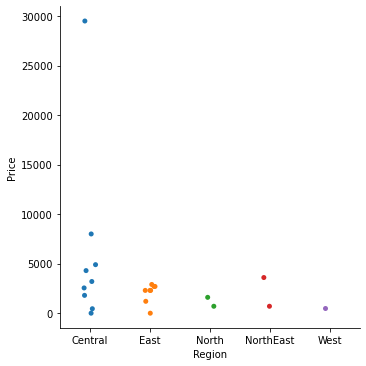

In [56]:
sns.catplot(x="Region", y='Price', data = df)